In [1]:
# ASSIGNMENT-2

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats


In [2]:
# ============================================================================
# Q1: Probability with Marbles (Without Replacement)
# ============================================================================
print("\n" + "=" * 70)
print("Q1: PROBABILITY WITH MARBLES")
print("=" * 70)

red_marbles = 5
blue_marbles = 7
total_marbles = red_marbles + blue_marbles

print(f"\nInitial Setup:")
print(f"  Red marbles: {red_marbles}")
print(f"  Blue marbles: {blue_marbles}")
print(f"  Total marbles: {total_marbles}")

print(f"\nGiven: First marble drawn was BLUE")
print(f"After removing one blue marble:")
print(f"  Red marbles remaining: {red_marbles}")
print(f"  Blue marbles remaining: {blue_marbles - 1}")
print(f"  Total marbles remaining: {total_marbles - 1}")

prob_second_red = red_marbles / (total_marbles - 1)
print(f"\nP(Second is Red | First is Blue) = {red_marbles}/{total_marbles - 1}")
print(f"                                  = {prob_second_red:.4f}")
print(f"                                  = {prob_second_red * 100:.2f}%")



Q1: PROBABILITY WITH MARBLES

Initial Setup:
  Red marbles: 5
  Blue marbles: 7
  Total marbles: 12

Given: First marble drawn was BLUE
After removing one blue marble:
  Red marbles remaining: 5
  Blue marbles remaining: 6
  Total marbles remaining: 11

P(Second is Red | First is Blue) = 5/11
                                  = 0.4545
                                  = 45.45%



Q2: BAYES' THEOREM - DISEASE TESTING

P(Disease | Positive Test) = 0.3242 or 32.42%
    📊 Visualization saved: q2_bayes_disease_testing.png


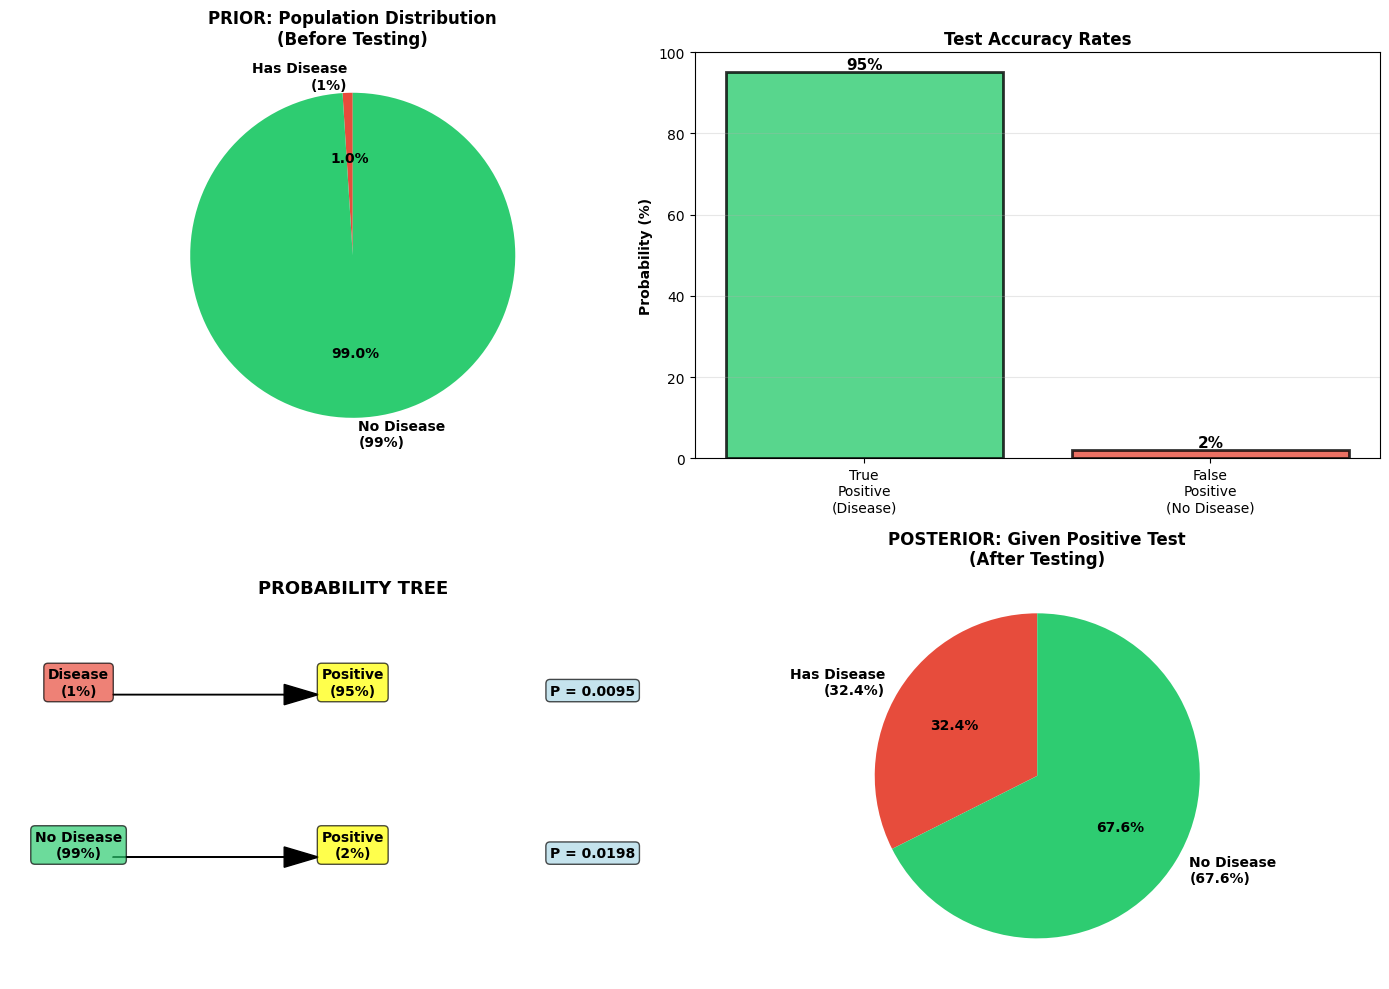

In [3]:
# ============================================================================
# Q2: Bayes' Theorem - Disease Testing
# ============================================================================
print("\n" + "=" * 70)
print("Q2: BAYES' THEOREM - DISEASE TESTING")
print("=" * 70)

p_disease = 0.01
p_no_disease = 0.99
p_pos_given_disease = 0.95
p_pos_given_no_disease = 0.02

p_positive = (p_pos_given_disease * p_disease) + (p_pos_given_no_disease * p_no_disease)
p_disease_given_positive = (p_pos_given_disease * p_disease) / p_positive

print(f"\nP(Disease | Positive Test) = {p_disease_given_positive:.4f} or {p_disease_given_positive*100:.2f}%")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Prior probabilities
prior_labels = ['Has Disease\n(1%)', 'No Disease\n(99%)']
prior_values = [p_disease*100, p_no_disease*100]
colors_prior = ['#e74c3c', '#2ecc71']
wedges, texts, autotexts = axes[0, 0].pie(prior_values, labels=prior_labels, autopct='%1.1f%%',
                                            colors=colors_prior, startangle=90, 
                                            textprops={'fontweight': 'bold', 'fontsize': 10})
axes[0, 0].set_title('PRIOR: Population Distribution\n(Before Testing)', fontweight='bold', fontsize=12)

# Plot 2: Test accuracy
categories = ['True\nPositive\n(Disease)', 'False\nPositive\n(No Disease)']
accuracies = [p_pos_given_disease*100, p_pos_given_no_disease*100]
colors_acc = ['#2ecc71', '#e74c3c']
bars = axes[0, 1].bar(categories, accuracies, color=colors_acc, edgecolor='black', linewidth=2, alpha=0.8)
axes[0, 1].set_ylabel('Probability (%)', fontweight='bold')
axes[0, 1].set_title('Test Accuracy Rates', fontweight='bold', fontsize=12)
axes[0, 1].set_ylim(0, 100)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{accuracies[i]:.0f}%',
                    ha='center', va='bottom', fontweight='bold', fontsize=11)

# Plot 3: Tree diagram visualization
axes[1, 0].text(0.5, 0.95, 'PROBABILITY TREE', ha='center', fontweight='bold', fontsize=13)
axes[1, 0].text(0.1, 0.7, f'Disease\n({p_disease*100:.0f}%)', ha='center', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='#e74c3c', alpha=0.7))
axes[1, 0].text(0.1, 0.3, f'No Disease\n({p_no_disease*100:.0f}%)', ha='center', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='#2ecc71', alpha=0.7))
axes[1, 0].text(0.5, 0.7, f'Positive\n({p_pos_given_disease*100:.0f}%)', ha='center', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
axes[1, 0].text(0.5, 0.3, f'Positive\n({p_pos_given_no_disease*100:.0f}%)', ha='center', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
axes[1, 0].arrow(0.15, 0.7, 0.25, 0, head_width=0.05, head_length=0.05, fc='black', ec='black')
axes[1, 0].arrow(0.15, 0.3, 0.25, 0, head_width=0.05, head_length=0.05, fc='black', ec='black')
axes[1, 0].text(0.85, 0.7, f'P = {p_pos_given_disease * p_disease:.4f}', ha='center', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
axes[1, 0].text(0.85, 0.3, f'P = {p_pos_given_no_disease * p_no_disease:.4f}', ha='center', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
axes[1, 0].set_xlim(0, 1)
axes[1, 0].set_ylim(0, 1)
axes[1, 0].axis('off')

# Plot 4: Posterior probability
posterior_labels = ['Has Disease\n(32.4%)', 'No Disease\n(67.6%)']
posterior_values = [p_disease_given_positive*100, (1-p_disease_given_positive)*100]
colors_post = ['#e74c3c', '#2ecc71']
wedges, texts, autotexts = axes[1, 1].pie(posterior_values, labels=posterior_labels, autopct='%1.1f%%',
                                            colors=colors_post, startangle=90,
                                            textprops={'fontweight': 'bold', 'fontsize': 10})
axes[1, 1].set_title('POSTERIOR: Given Positive Test\n(After Testing)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('q2_bayes_disease_testing.png', dpi=300, bbox_inches='tight')
print("    📊 Visualization saved: q2_bayes_disease_testing.png")


In [4]:
# ============================================================================
# Q3: Revising Doctor's Opinion
# ============================================================================
print("\n" + "=" * 70)
print("Q3: REVISING DOCTOR'S OPINION")
print("=" * 70)

# New prior based on doctor's examination
p_disease_doctor = 0.30  # Doctor thinks 30% chance based on symptoms
p_no_disease_doctor = 0.70

print(f"\nInitial Situation:")
print(f"  Doctor's opinion (before test): P(Disease) = {p_disease_doctor} (30%)")
print(f"  Blood test comes back: POSITIVE")

# Calculate new P(Positive) with updated prior
p_positive_new = (p_pos_given_disease * p_disease_doctor) + (p_pos_given_no_disease * p_no_disease_doctor)

print(f"\nStep 1: Calculate P(Positive) with new prior")
print(f"  P(Positive) = ({p_pos_given_disease} × {p_disease_doctor}) + ({p_pos_given_no_disease} × {p_no_disease_doctor})")
print(f"  P(Positive) = {p_pos_given_disease * p_disease_doctor:.4f} + {p_pos_given_no_disease * p_no_disease_doctor:.4f}")
print(f"  P(Positive) = {p_positive_new:.4f}")

# Apply Bayes' Theorem with new prior
p_disease_given_positive_new = (p_pos_given_disease * p_disease_doctor) / p_positive_new

print(f"\nStep 2: Apply Bayes' Theorem")
print(f"  P(Disease|Positive) = ({p_pos_given_disease} × {p_disease_doctor}) / {p_positive_new:.4f}")
print(f"  P(Disease|Positive) = {p_pos_given_disease * p_disease_doctor:.4f} / {p_positive_new:.4f}")
print(f"  P(Disease|Positive) = {p_disease_given_positive_new:.4f}")
print(f"                      = {p_disease_given_positive_new * 100:.2f}%")

print(f"\nREVISED OPINION:")
print(f"  Doctor should revise opinion from 30% to {p_disease_given_positive_new * 100:.2f}%")
print(f"  The positive test SIGNIFICANTLY increases the probability!")

print(f"\nCOMPARISON:")
print(f"  Random person with positive test: {p_disease_given_positive * 100:.2f}%")
print(f"  Patient with symptoms + positive test: {p_disease_given_positive_new * 100:.2f}%")
print(f"  Higher prior probability → stronger evidence!")




Q3: REVISING DOCTOR'S OPINION

Initial Situation:
  Doctor's opinion (before test): P(Disease) = 0.3 (30%)
  Blood test comes back: POSITIVE

Step 1: Calculate P(Positive) with new prior
  P(Positive) = (0.95 × 0.3) + (0.02 × 0.7)
  P(Positive) = 0.2850 + 0.0140
  P(Positive) = 0.2990

Step 2: Apply Bayes' Theorem
  P(Disease|Positive) = (0.95 × 0.3) / 0.2990
  P(Disease|Positive) = 0.2850 / 0.2990
  P(Disease|Positive) = 0.9532
                      = 95.32%

REVISED OPINION:
  Doctor should revise opinion from 30% to 95.32%
  The positive test SIGNIFICANTLY increases the probability!

COMPARISON:
  Random person with positive test: 32.42%
  Patient with symptoms + positive test: 95.32%
  Higher prior probability → stronger evidence!



Q4 & Q5: VENN DIAGRAM - STUDENT SUBJECTS

Given:
  Total students: 50
  Study Physics: 30
  Study Chemistry: 25
  Study Both: 15

Calculations:
  Only Physics = Total Physics - Both
                = 30 - 15 = 15
  Only Chemistry = Total Chemistry - Both
                  = 25 - 15 = 10
  Neither = Total - (Only P + Only C + Both)
           = 50 - (15 + 10 + 15)
           = 50 - 40 = 10

Venn Diagram Breakdown:
  ┌─────────────────────────────────────┐
  │  Total Students = 50              │
  │                                     │
  │   Physics          Chemistry        │
  │  ┌────────┐      ┌────────┐         │
  │  │        │      │        │         │
  │  │   15   │  15  │   10   │         │
  │  │        │ Both │        │         │
  │  └────────┘      └────────┘         │
  │                                     │
  │         Neither = 10                 │
  └─────────────────────────────────────┘

Find: P(Student studies only Physics)
  P(Only Physics) = Number studying only

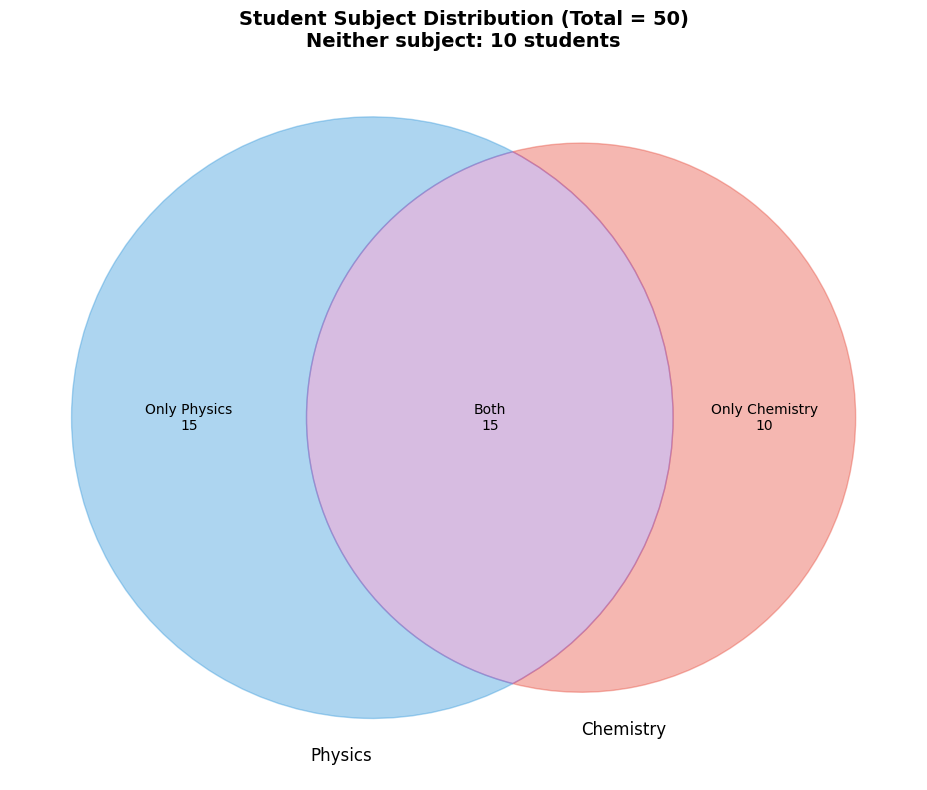

In [5]:
# ============================================================================
# Q4 & Q5: Venn Diagram Problem (Both identical)
# ============================================================================
print("\n" + "=" * 70)
print("Q4 & Q5: VENN DIAGRAM - STUDENT SUBJECTS")
print("=" * 70)

total_students = 50
physics = 30
chemistry = 25
both_subjects = 15

# Calculate each region
only_physics = physics - both_subjects
only_chemistry = chemistry - both_subjects
neither = total_students - (only_physics + only_chemistry + both_subjects)

print(f"\nGiven:")
print(f"  Total students: {total_students}")
print(f"  Study Physics: {physics}")
print(f"  Study Chemistry: {chemistry}")
print(f"  Study Both: {both_subjects}")

print(f"\nCalculations:")
print(f"  Only Physics = Total Physics - Both")
print(f"                = {physics} - {both_subjects} = {only_physics}")
print(f"  Only Chemistry = Total Chemistry - Both")
print(f"                  = {chemistry} - {both_subjects} = {only_chemistry}")
print(f"  Neither = Total - (Only P + Only C + Both)")
print(f"           = {total_students} - ({only_physics} + {only_chemistry} + {both_subjects})")
print(f"           = {total_students} - {only_physics + only_chemistry + both_subjects} = {neither}")

print(f"\nVenn Diagram Breakdown:")
print(f"  ┌─────────────────────────────────────┐")
print(f"  │  Total Students = {total_students}              │")
print(f"  │                                     │")
print(f"  │   Physics          Chemistry        │")
print(f"  │  ┌────────┐      ┌────────┐         │")
print(f"  │  │        │      │        │         │")
print(f"  │  │   {only_physics}   │  {both_subjects}  │   {only_chemistry}   │         │")
print(f"  │  │        │ Both │        │         │")
print(f"  │  └────────┘      └────────┘         │")
print(f"  │                                     │")
print(f"  │         Neither = {neither}                 │")
print(f"  └─────────────────────────────────────┘")

# Calculate probability
prob_only_physics = only_physics / total_students

print(f"\nFind: P(Student studies only Physics)")
print(f"  P(Only Physics) = Number studying only Physics / Total students")
print(f"  P(Only Physics) = {only_physics} / {total_students}")
print(f"  P(Only Physics) = {prob_only_physics:.2f}")
print(f"                  = {prob_only_physics * 100:.1f}%")

# Verification
print(f"\nVerification:")
print(f"  Only Physics: {only_physics}")
print(f"  Only Chemistry: {only_chemistry}")
print(f"  Both: {both_subjects}")
print(f"  Neither: {neither}")
print(f"  Total: {only_physics + only_chemistry + both_subjects + neither}")
print(f"  ✓ Matches {total_students} students!")

# Create Venn Diagram visualization
%pip install matplotlib-venn
from matplotlib_venn import venn2

plt.figure(figsize=(10, 8))
v = venn2(subsets=(only_physics, only_chemistry, both_subjects),set_labels=('Physics', 'Chemistry'))

# Customize colors
v.get_patch_by_id('10').set_color('#3498db')
v.get_patch_by_id('01').set_color('#e74c3c')
v.get_patch_by_id('11').set_color('#9b59b6')

# Add labels with values
v.get_label_by_id('10').set_text(f'Only Physics\n{only_physics}')
v.get_label_by_id('01').set_text(f'Only Chemistry\n{only_chemistry}')
v.get_label_by_id('11').set_text(f'Both\n{both_subjects}')

plt.title(f'Student Subject Distribution (Total = {total_students})\nNeither subject: {neither} students',  fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('venn_diagram_subjects.png', dpi=300, bbox_inches='tight')
print(f"\nVenn Diagram saved as 'venn_diagram_subjects.png'")

print("\n" + "=" * 70)
print("ALL ASSIGNMENTS COMPLETED!")
print("=" * 70)
print("\nGraphs saved:")
print("  1. learning_modes_bar_chart.png")
print("  2. venn_diagram_subjects.png")